In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import psycopg2
from dotenv import dotenv_values
import plotly.express as px

In [59]:
df_map_bundeslaender = gpd.read_file('data/bundeslaender.shp')

In [60]:
df_map_bundeslaender

,USE,RS,RS_ALT,GEN,SHAPE_LENG,SHAPE_AREA,geometry
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53..."
1,2,03,030000000000,Niedersachsen,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8..."
2,2,04,040000000000,Bremen,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2..."
3,2,05,050000000000,Nordrhein-Westfalen,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ..."
4,2,06,060000000000,Hessen,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ..."
5,2,07,070000000000,Rheinland-Pfalz,9.106504e+05,1.983491e+10,"POLYGON ((7.84657 50.87861, 7.85901 50.87733, ..."
6,2,08,080000000000,Baden-Württemberg,1.298892e+06,3.580140e+10,"MULTIPOLYGON (((9.64634 49.77782, 9.63806 49.7..."
7,2,09,090000000000,Bayern,2.046039e+06,7.055007e+10,"POLYGON ((10.47207 47.56964, 10.47319 47.57081..."
8,2,10,100000000000,Saarland,2.829108e+05,2.578542e+09,"POLYGON ((7.06853 49.62349, 7.08023 49.61196, ..."
9,2,11,110000000000,Berlin,1.807512e+05,8.864801e+08,"POLYGON ((13.61192 52.54332, 13.62461 52.53797..."


In [29]:
df_map_bundeslaender.rename(columns={'GEN':'bundesland'}, inplace=True)
df_map_bundeslaender

,USE,RS,RS_ALT,bundesland,SHAPE_LENG,SHAPE_AREA,geometry
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53..."
1,2,03,030000000000,Niedersachsen,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8..."
2,2,04,040000000000,Bremen,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2..."
3,2,05,050000000000,Nordrhein-Westfalen,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ..."
4,2,06,060000000000,Hessen,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ..."
5,2,07,070000000000,Rheinland-Pfalz,9.106504e+05,1.983491e+10,"POLYGON ((7.84657 50.87861, 7.85901 50.87733, ..."
6,2,08,080000000000,Baden-Württemberg,1.298892e+06,3.580140e+10,"MULTIPOLYGON (((9.64634 49.77782, 9.63806 49.7..."
7,2,09,090000000000,Bayern,2.046039e+06,7.055007e+10,"POLYGON ((10.47207 47.56964, 10.47319 47.57081..."
8,2,10,100000000000,Saarland,2.829108e+05,2.578542e+09,"POLYGON ((7.06853 49.62349, 7.08023 49.61196, ..."
9,2,11,110000000000,Berlin,1.807512e+05,8.864801e+08,"POLYGON ((13.61192 52.54332, 13.62461 52.53797..."


(5.4074115870112625, 15.49633056180143, 46.88101170798465, 55.446725320170714)

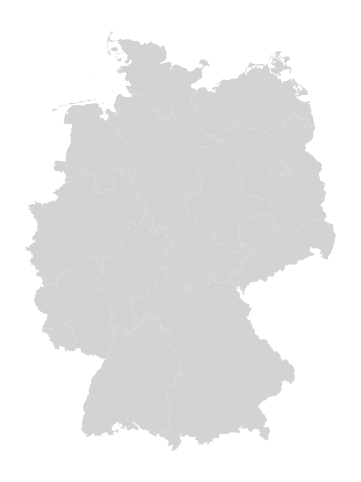

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
df_map_bundeslaender.plot(ax=ax, color='lightgray')
plt.axis('off')

In [23]:
# Get db credentials from .env file
cred = dotenv_values('.env')

In [24]:
def get_dataframe(query):
    '''
    Make a query in the database and
    return the result as a pandas dataframe.
    '''
    # use .env credentials instead of streamlit secret
    con = psycopg2.connect(
        host = cred['host'],
        port = cred['port'],
        database = cred['database'],
        user = cred['user'],
        password = cred['password']
    )
    cur = con.cursor()
    cur.execute(query)
    result = cur.fetchall()
    cur.close()
    con.close()
    return pd.DataFrame(result)

In [50]:
query = '''
    select schluessel, straftat, bundesland, anzahl_erfasste_faelle, year
    from public.laender_grund_2022_until_2018
    where schluessel = '------'
    and bundesland != 'Bundesrepublik Deutschland';
'''
df_crimes_bundeslaender = get_dataframe(query)
df_crimes_bundeslaender

,0,1,2,3,4
0,------,Straftaten insgesamt,Baden-Württemberg,550008,2022
1,------,Straftaten insgesamt,Bayern,619089,2022
2,------,Straftaten insgesamt,Berlin,519822,2022
3,------,Straftaten insgesamt,Brandenburg,170204,2022
4,------,Straftaten insgesamt,Bremen,79713,2022
...,...,...,...,...,...
75,------,Straftaten insgesamt,Saarland,70873,2018
76,------,Straftaten insgesamt,Sachsen,278796,2018
77,------,Straftaten insgesamt,Sachsen-Anhalt,175625,2018
78,------,Straftaten insgesamt,Schleswig-Holstein,186894,2018


In [51]:
df_crimes_bundeslaender.columns = ['schluessel', 'straftat', 'bundesland', 'anzahl_erfasste_faelle', 'year']
df_crimes_bundeslaender

,schluessel,straftat,bundesland,anzahl_erfasste_faelle,year
0,------,Straftaten insgesamt,Baden-Württemberg,550008,2022
1,------,Straftaten insgesamt,Bayern,619089,2022
2,------,Straftaten insgesamt,Berlin,519822,2022
3,------,Straftaten insgesamt,Brandenburg,170204,2022
4,------,Straftaten insgesamt,Bremen,79713,2022
...,...,...,...,...,...
75,------,Straftaten insgesamt,Saarland,70873,2018
76,------,Straftaten insgesamt,Sachsen,278796,2018
77,------,Straftaten insgesamt,Sachsen-Anhalt,175625,2018
78,------,Straftaten insgesamt,Schleswig-Holstein,186894,2018


In [52]:
df_map_crimes_bundeslaender = df_map_bundeslaender.merge(df_crimes_bundeslaender, on='bundesland')
df_map_crimes_bundeslaender

,USE,RS,RS_ALT,bundesland,SHAPE_LENG,SHAPE_AREA,geometry,schluessel,straftat,anzahl_erfasste_faelle,year
0,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",------,Straftaten insgesamt,211239,2022
1,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",------,Straftaten insgesamt,186403,2021
2,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",------,Straftaten insgesamt,203526,2020
3,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",------,Straftaten insgesamt,210832,2019
4,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",------,Straftaten insgesamt,218594,2018
...,...,...,...,...,...,...,...,...,...,...,...
75,2,01,010000000000,Schleswig-Holstein,1.217256e+06,1.585743e+10,"MULTIPOLYGON (((8.44703 55.05034, 8.46057 55.0...",------,Straftaten insgesamt,221183,2022
76,2,01,010000000000,Schleswig-Holstein,1.217256e+06,1.585743e+10,"MULTIPOLYGON (((8.44703 55.05034, 8.46057 55.0...",------,Straftaten insgesamt,176893,2021
77,2,01,010000000000,Schleswig-Holstein,1.217256e+06,1.585743e+10,"MULTIPOLYGON (((8.44703 55.05034, 8.46057 55.0...",------,Straftaten insgesamt,173929,2020
78,2,01,010000000000,Schleswig-Holstein,1.217256e+06,1.585743e+10,"MULTIPOLYGON (((8.44703 55.05034, 8.46057 55.0...",------,Straftaten insgesamt,183445,2019


In [58]:
year = '2019'
df_tmp = df_map_crimes_bundeslaender[df_map_crimes_bundeslaender['year'] == year]
df_tmp

,USE,RS,RS_ALT,bundesland,SHAPE_LENG,SHAPE_AREA,geometry,schluessel,straftat,anzahl_erfasste_faelle,year
3,2,02,020000000000,Hamburg,1.752538e+05,7.605398e+08,"MULTIPOLYGON (((10.19114 53.72299, 10.18210 53...",------,Straftaten insgesamt,210832,2019
8,2,03,030000000000,Niedersachsen,2.016496e+06,4.771641e+10,"MULTIPOLYGON (((8.68962 53.87999, 8.69297 53.8...",------,Straftaten insgesamt,506582,2019
13,2,04,040000000000,Bremen,1.549716e+05,4.054809e+08,"MULTIPOLYGON (((8.52976 53.21640, 8.55399 53.2...",------,Straftaten insgesamt,78228,2019
18,2,05,050000000000,Nordrhein-Westfalen,1.352108e+06,3.404727e+10,"POLYGON ((8.66673 52.52149, 8.70289 52.50053, ...",------,Straftaten insgesamt,1227929,2019
23,2,06,060000000000,Hessen,1.105093e+06,2.109232e+10,"POLYGON ((9.50560 51.62777, 9.50842 51.62712, ...",------,Straftaten insgesamt,364833,2019
28,2,07,070000000000,Rheinland-Pfalz,9.106504e+05,1.983491e+10,"POLYGON ((7.84657 50.87861, 7.85901 50.87733, ...",------,Straftaten insgesamt,241529,2019
33,2,08,080000000000,Baden-Württemberg,1.298892e+06,3.580140e+10,"MULTIPOLYGON (((9.64634 49.77782, 9.63806 49.7...",------,Straftaten insgesamt,573813,2019
38,2,09,090000000000,Bayern,2.046039e+06,7.055007e+10,"POLYGON ((10.47207 47.56964, 10.47319 47.57081...",------,Straftaten insgesamt,603464,2019
43,2,10,100000000000,Saarland,2.829108e+05,2.578542e+09,"POLYGON ((7.06853 49.62349, 7.08023 49.61196, ...",------,Straftaten insgesamt,74719,2019
48,2,11,110000000000,Berlin,1.807512e+05,8.864801e+08,"POLYGON ((13.61192 52.54332, 13.62461 52.53797...",------,Straftaten insgesamt,513426,2019


Text(0.5, 1.0, 'Crimes in Germany - 2022')

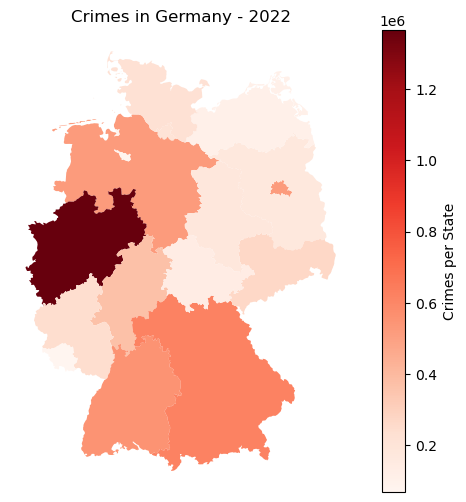

In [61]:
year = '2022'
df_tmp = df_map_crimes_bundeslaender[df_map_crimes_bundeslaender['year'] == year]
fig, ax = plt.subplots(figsize=(8,6))
df_tmp.plot(
    column='anzahl_erfasste_faelle', 
    ax=ax, 
    legend=True,
    legend_kwds={"label": "Crimes per State", "orientation": "vertical"},
    cmap='Reds'
)
plt.axis('off')
plt.ticklabel_format(useOffset=False, style='plain')
plt.title(f'Crimes in Germany - {year}')